<font color=green> Привет еще раз. Спасибо, что доделала работу. Мои комментарии на этот раз выделены зеленым цветом.
    
---

---
## Комментарий от наставника

Привет! Спасибо, что прислала задание:) В целом, работа производит неплохое впечатление, однако обрати внимание на некоторые мои комментарии. Они обозначены пометкой **Комментарий от наставника**. Пострайся учесть эти комментарии в дальнейшем.

---

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Краткое вступление в работу 
В данной работе необходимо провести исследовательский анализ о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет, а именно определять рыночную стоимость объектов недвижимости по необходимым параметрам, которые нам даны в виде информации от пользователей и на основе  картографических данных.
Перед тем как приступить к анализу необходимо предработать данные:
- Заполнить пропущенные значения.
- Привести данные к нужному типу.

      Описание данных: 
-  airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
-  balcony — число балконов
- ceiling_height — высота потолков (м)
-  cityCenters_nearest — расстояние до центра города (м)
-  days_exposition — сколько дней было размещено объявление (от публикации до снятия)
-  first_day_exposition — дата публикации
-  floor — этаж
-  floors_total — всего этажей в доме
-  is_apartment — апартаменты (булев тип)
-  kitchen_area — площадь кухни в квадратных метрах (м²)
-  last_price — цена на момент снятия с публикации
-  living_area — жилая площадь в квадратных метрах(м²)
-  locality_name — название населённого пункта
-  open_plan — свободная планировка (булев тип)
-  parks_around3000 — число парков в радиусе 3 км
-  parks_nearest — расстояние до ближайшего парка (м)
-  ponds_around3000 — число водоёмов в радиусе 3 км
-  ponds_nearest — расстояние до ближайшего водоёма (м)
-  rooms — число комнат
-  studio — квартира-студия (булев тип)
-  total_area — площадь квартиры в квадратных метрах (м²)
-  total_images — число фотографий квартиры в объявлении

---
## Комментарий от наставника

Хорошее вступление в работу. Стоит также делать описание исходных данных.

---

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime
from pymystem3 import Mystem
flat_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal=',')

In [2]:
flat_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
flat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null object
total_area              23699 non-null object
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null object
floors_total            23613 non-null object
living_area             21796 non-null object
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null object
balcony                 12180 non-null object
locality_name           23650 non-null object
airports_nearest        18157 non-null object
cityCenters_nearest     18180 non-null object
parks_around3000        18181 non-null object
parks_nearest           8079 non-null object
ponds_around3000        18

### Вывод

Открыла таблицу с необходимыми разделителями, для того, чтобы данные читались корректно. Видим, что количество столбцов 23, количество строк 23699. Есть большое количество пропусков и практически в каждом столбце неопределен тип данных.Заметим так же, что большую  часть  пропусков составляют данные, которые заполнялись автоматически на картографических данных. Есть гипотеза, что эти цифры не проставлены в основном у тех объектов недвижимости, что находятся действительно далеко от рассматриваемых параметов (какой-нибудь далекий пригород) и поэтому эта цифра просто не заводится. 
По поводу типов данных: наши данные искажены пропусками, как раз таки благодаря им и не определены корректно типы данных столбцов. 

---
## Комментарий от наставника

Подумай также о возможных причинах появления пропусков, а также о том, являются ли они случайными или нет.

Первый взгляд на таблицу выполнен.

---

### Шаг 2. Предобработка данных

## Определение и изучение пропущенныx значений. 

Начинаем анализ пропусков: 

In [4]:
flat_data['ceiling_height'].unique()

array(['2.7', nan, '3.03', '2.5', '2.67', '2.56', '3.05', '2.75', '2.6',
       '2.9', '2.8', '2.55', '3.0', '2.65', '3.2', '2.61', '3.25', '3.45',
       '2.77', '2.85', '2.64', '2.57', '4.15', '3.5', '3.3', '2.71',
       '4.0', '2.47', '2.73', '2.84', '3.1', '2.34', '3.4', '3.06',
       '2.72', '2.54', '2.51', '2.78', '2.76', '25.0', '2.58', '3.7',
       '2.52', '5.2', '2.87', '2.66', '2.59', '2.0', '2.45', '3.6',
       '2.92', '3.11', '3.13', '3.8', '3.15', '3.55', '3.16', '3.62',
       '3.12', '2.53', '2.74', '2.96', '2.46', '5.3', '5.0', '2.79',
       '2.95', '4.06', '2.94', '3.82', '3.54', '3.53', '2.83', '4.7',
       '2.4', '3.38', '3.01', '5.6', '3.65', '3.9', '3.18', '3.35', '2.3',
       '3.57', '2.48', '2.62', '2.82', '3.98', '2.63', '3.83', '3.52',
       '3.95', '3.75', '2.88', '3.67', '3.87', '3.66', '3.85', '3.86',
       '4.19', '3.24', '4.8', '4.5', '4.2', '3.36', '32.0', '3.08',
       '3.68', '3.07', '3.37', '3.09', '8.0', '3.26', '3.34', '2.81',
       '3.44'

Для того, чтобы данные не были искажены не будем брать среднее по всему столбцу, а заполним пропуски средним по населенным пунктам. После работы функции всё же остались пропуски, предполагаем, что не заполнились они  из-за того, что в незаполненных регионах нет строк с заполненной высотой потолка. Поэтому взяли медиану по всему столбцу ceiling_height. Так как тип был неопределен перевели в целочисленный тип. Возможно пропуски были, так как сами инициаторы объявлений о продаже квартир считали, что это не важный параметр для продаж квартир.  

In [5]:
flat_data['ceiling_height'] = pd.to_numeric(flat_data['ceiling_height'])

median = flat_data.groupby('locality_name')['ceiling_height'].median()    
 
def ceiling_height_median(row):
    locality= row['locality_name']
    ceiling_height = row['ceiling_height']
   
    if locality in median.index:
        return median[locality]
    return ceiling_height
flat_data.loc[flat_data['ceiling_height'].isnull(),'ceiling_height'] = flat_data.apply(ceiling_height_median, axis = 1)

ceiling_height_mean = flat_data['ceiling_height'].mean()
flat_data['ceiling_height'] = flat_data['ceiling_height'].fillna(value = ceiling_height_mean)
flat_data['ceiling_height'] = flat_data['ceiling_height'].astype('int')


---
## Комментарий от наставника

Заполнение такого количества данных одним средним значением может сильно исказить результат. Лучше использовать заполнение по категориям или же оставить эти пропуски. Лучше работать с меньшим количеством данных хорошего качества, чем с большим, если качество этих данных будет вызывать вопросы.

---

При заполнении пропусков в столбце floors_total придерживаемся такой же логики и как в столбце ceiling_height. Пропусков в данном столбце не так много, поэтому предположу, что среди них возможно частные дома, так как мы рассматриваем не только город, но и пригород Санкт-Петербурга. 

In [6]:
flat_data['floors_total'] = pd.to_numeric(flat_data['floors_total'])
median = flat_data.groupby('locality_name')['floors_total'].median()    
 
def floors_total_median(row):
    locality= row['locality_name']
    floors_total = row['floors_total']
   
    if locality in median.index:
        return median[locality]
    return floors_total
 
flat_data.loc[flat_data['floors_total'].isnull(),'floors_total'] = flat_data.apply( floors_total_median, axis = 1)
floors_total_mean = flat_data['ceiling_height'].mean()
flat_data['floors_total'] = flat_data['floors_total'].fillna(value = floors_total_mean)
flat_data['floors_total'] = flat_data['floors_total'].astype('int')

---
## Комментарий от наставника

Стоит посмотреть на эти квартиры подробнее. Если она находится на 5 этаже, к примеру, но общее число этажей не указано, то при замене пропуска в общем числе этажей на 1 ты испортишь данные. Так делать не стоит.

---

---
## Комментарий от наставника

У нас данные о продаже квартир, поэтому гипотеза о нежилых помещениях вызывает вопросы. Для заполненния пропусков в площадях надо рассчитать среднюю долю данного помещения (кухни или жилого пространства) в зависимости от числа комнат, например, критерий может быть любой. Потом эту долю следует умножить на общую площадь. Тем самым мы найдем значения площадей.

---

Создали сгуруппированную таблицу по критерию количества комнат нашли среднее по столбца общей площади и жилой. 

In [7]:
flat_data['total_area'] = pd.to_numeric(flat_data['total_area'])
flat_data['total_area'] = flat_data['total_area'].astype('int')

In [8]:
flat_data['living_area'] = pd.to_numeric(flat_data['living_area'])
mean_area = flat_data.groupby('rooms').agg({'living_area' : 'mean', 'total_area' : 'mean'})
mean_area 

,living_area,total_area
rooms,,
0,18.865246,29.081218
1,17.893552,37.406860
2,31.736849,55.625945
3,47.387941,77.543000
4,66.983223,107.394068
5,100.009247,161.306748
6,130.983636,201.342857
7,163.564151,265.169492
8,168.683333,259.083333


Далее с помощью деления жилой площади на общую, находим усредненный коэффициент, точнее среднее отношение жилой площади к общей. Затем этот коэффициент умножаем на общую площадь и заполняем пропуски в жилой площади посредством функции и переводим в целочисленный тип, так как тип был неопределен. 

In [9]:
mean_area['K'] = mean_area['living_area']/mean_area['total_area']
 
def fill_living_area(row):
    rooms = row['rooms']
    total_area = row['total_area']
    living_area = row['living_area']
   
    if rooms in mean_area.index:
        return mean_area.loc[rooms, 'K']*total_area
    return living_area
 
flat_data.loc[flat_data['living_area'].isnull(),'living_area'] = flat_data.apply(fill_living_area, axis = 1)
flat_data['living_area'] = flat_data['living_area'].astype('int')


In [10]:
flat_data['is_apartment'].unique()
flat_data['is_apartment'] = flat_data['is_apartment'].fillna(value=False)
flat_data['is_apartment'] = pd.to_numeric(flat_data['is_apartment'])
flat_data['is_apartment'] = flat_data['is_apartment'].astype('bool')

В столбце is_apartment пропущенные  значения решила сменить на False, раз не указали, что это апартаменты, значит это не апартаменты. И сразу же приводим к булевскому типу. 

---
## Комментарий от наставника

У нас есть отметка о квартирах-студиях в данных. Значит, проверить эту гипотезу можно. Но, опять же, все квартиры - жилые.

---

При заполнении пропущенных значений в столбце kitchen_area придерживалась такой же логики как и в столбце living_area. 


In [11]:
flat_data['kitchen_area'] = pd.to_numeric(flat_data['kitchen_area'])
area_D = flat_data.groupby('rooms').agg({'kitchen_area' : 'mean', 'total_area' : 'mean'})

In [12]:
area_D['K/t'] = area_D['kitchen_area']/area_D['total_area']
 
def fill_kitchen_area(row):
    rooms = row['rooms']
    total_area = row['total_area']
    kitchen_area = row['kitchen_area']
   
    if rooms in area_D.index:
        return area_D.loc[rooms, 'K/t']*total_area
    return living_area
 
flat_data.loc[flat_data['kitchen_area'].isnull(),'kitchen_area'] = flat_data.apply(fill_kitchen_area, axis = 1)
kitchen_area_mean = flat_data['kitchen_area'].mean()
flat_data['kitchen_area'] = flat_data['kitchen_area'].fillna(value = kitchen_area_mean)
flat_data['kitchen_area'] = flat_data['kitchen_area'].astype('int')


Балконы предусмотрены не во всех квартирах, частных домах поэтому значения заменены на 0. 
И сразу переводим в целочисленный тип, так как тип был не определен.

In [13]:
flat_data['balcony'].unique()
flat_data['balcony'] = flat_data['balcony'].fillna(value=0)
flat_data['balcony'] = pd.to_numeric(flat_data['balcony'])
flat_data['balcony'] = flat_data['balcony'].astype('int')
flat_data['balcony'].unique()

array([0, 2, 1, 5, 4, 3])

В столбце locality_name заменила пропуски на пустое значение. Считаю, что причина пропусков в данном столбце из за ошибки автоматического считывания информации, возможно населенный пункт был не распознан.

In [14]:
flat_data['locality_name'].isnull().sum()
flat_data['locality_name'] = flat_data['locality_name'].fillna(value='')
flat_data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [15]:
flat_data['airports_nearest'] = pd.to_numeric(flat_data['airports_nearest'])
airports_nearest_mean = flat_data[flat_data['locality_name'] != 'Санкт-Петербург']['airports_nearest'].mean()
#airports_nearest_mean = flat_data['airports_nearest'].mean()
flat_data['airports_nearest'] = flat_data['airports_nearest'].fillna(value = airports_nearest_mean)
flat_data['airports_nearest'] = flat_data['airports_nearest'].astype('int')


В столбцах cityCenters_nearest, airports_nearest решила посчитать среднее по логическому условию, которое предусмотревает, что пропуски будут заполняться по пригороду Санкт-Петербуга, так как было бы не очень правильно,если бы считали среднее по всему столбцу , так как есть населенные пункты далекие от Питера. 

In [16]:
flat_data['cityCenters_nearest'].isnull().sum()

5519

In [17]:
flat_data['cityCenters_nearest'] = pd.to_numeric(flat_data['cityCenters_nearest'])
#flat_data['cityCenters_nearest'] = flat_data['cityCenters_nearest'].fillna(value = 0)
#result = flat_data['locality_name'].value_counts()
#for name, count in result.items():
    #mean = flat_data.query('locality_name == @name  & cityCenters_nearest != 0').filter(["cityCenters_nearest"]).mean()
    #print(mean, name)
cityCenters_nearest_mean = flat_data[flat_data['locality_name'] != 'Санкт-Петербург']['cityCenters_nearest'].mean()
flat_data['cityCenters_nearest'] = flat_data['cityCenters_nearest'].fillna(value = cityCenters_nearest_mean)
flat_data['cityCenters_nearest'] = flat_data['cityCenters_nearest'].astype('int')


In [18]:
flat_data['parks_around3000'] = flat_data['parks_around3000'].fillna(value=-1)
flat_data['parks_around3000'] = pd.to_numeric(flat_data['parks_around3000'])
flat_data['parks_around3000'] = flat_data['parks_around3000'].astype('int')


In [19]:
flat_data['parks_nearest'] = pd.to_numeric(flat_data['parks_nearest'])
flat_data['parks_nearest'] = flat_data['parks_nearest'].fillna(value = -1)
flat_data['parks_nearest'] = flat_data['parks_nearest'].astype('int')


In [20]:
flat_data['ponds_nearest'].unique()
flat_data['ponds_nearest'] = flat_data['ponds_nearest'].fillna(value=-1)
flat_data['ponds_nearest'] = pd.to_numeric(flat_data['ponds_nearest'])
flat_data['ponds_nearest'] = flat_data['ponds_nearest'].astype('int')


In [21]:
flat_data['ponds_around3000'].unique()
flat_data['ponds_around3000'] = flat_data['ponds_around3000'].fillna(value=-1)
flat_data['ponds_around3000'] = pd.to_numeric(flat_data['ponds_around3000'])
flat_data['ponds_around3000'] = flat_data['ponds_around3000'].astype('int')


In [22]:
flat_data['days_exposition'] = pd.to_numeric(flat_data['days_exposition'])
days_exposition_mean = flat_data['days_exposition'].mean()
flat_data['days_exposition'] = flat_data['days_exposition'].fillna(value = days_exposition_mean)
flat_data['days_exposition'] = flat_data['days_exposition'].astype('int')


In [23]:
flat_data['last_price'] = pd.to_numeric(flat_data['last_price'])
flat_data['last_price'] = flat_data['last_price'].astype('int')

В столбцах с географическими параметрами значения заменили на -1, что то вроде наподобия маркера, который нам дает знак, что в этих ячейкаx есть пропуск. Есть гипотеза, что цифры с географическими параметрами не проставлены в основном у тех объектов недвижимости, что находятся действительно далеко от рассматриваемых параметров (какой-нибудь далекий пригород) и поэтому эта цифра просто не заводится.

In [24]:
flat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null int64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null int64
floors_total            23699 non-null int64
living_area             23699 non-null int64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null int64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null int64
cityCenters_nearest     23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000        23699 non-nul

А вот и результат проделанной работы все пропуски заполнены, типы данных заменены соответствующим типом данных. 

---
## Комментарий от наставника

Заполнить достоверно столбцы с географическими параметрами довольно сложно. Можно использовать индикаторные значения, т.е. те, которые будут сигнализировать нам о пропуске в данной ячейке, например, -1.

Обработку пропусков стоит улучшить. Замены должны быть правдоподобными. Цель обработки пропусков - не просто их убрать, а улучшить качество данных.

---

<font color=green> Теперь пропуски обработы лучше. Такие замены возможны, все верно.
    
---

### Шаг 3. Посчитайте и добавьте в таблицу

Посчитаем цену за квадратный метр. 

In [25]:
flat_data['price_square_meter']= flat_data['last_price']/flat_data['total_area']
flat_data['price_square_meter'] = flat_data['price_square_meter'].astype('int')


Добавляем в таблицу день недели, месяц и год публикации объявления. 

In [26]:
flat_data['publication_date'] = pd.to_datetime(flat_data['first_day_exposition'], format='%Y-%m-%d %H:%M')
flat_data['weekday'] = flat_data['publication_date'].dt.weekday
flat_data['publication_date_year'] = pd.DatetimeIndex(flat_data['first_day_exposition']).year 
flat_data['publication_date_month'] = pd.DatetimeIndex(flat_data['first_day_exposition']).month
flat_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,publication_date,weekday,publication_date_year,publication_date_year_month
0,20,13000000,108,2019-03-07T00:00:00,3,2,16,51,8,False,...,1,482,2,755,180,120370,2019-03-07,3,2019,3
1,7,3350000,40,2018-12-04T00:00:00,1,2,11,18,1,False,...,0,-1,0,-1,81,83750,2018-12-04,1,2018,12
2,10,5196000,56,2015-08-20T00:00:00,2,2,5,34,4,False,...,1,90,2,574,558,92785,2015-08-20,3,2015,8
3,0,64900000,159,2015-07-24T00:00:00,3,2,14,97,9,False,...,2,84,3,234,424,408176,2015-07-24,4,2015,7
4,2,10000000,100,2018-06-19T00:00:00,2,3,14,32,13,False,...,2,112,1,48,121,100000,2018-06-19,1,2018,6


---
## Комментарий от наставника

День недели добавлен, а вот месяц и год нет.

---

Добавляем в таблицу этаж квартиры:первый, последний, другой. 

In [27]:
flat_data['floor'].min()

1

In [28]:
flat_data['floor'].max()

33

In [29]:
def floor1(floor): 
    if floor == 1: 
        return 'Первый этаж'
    if floor == 33: 
        return 'Последний этаж'
    
    return 'Другой этаж'
    
flat_data['floor1'] = flat_data['floor'].apply(floor1)
flat_data['floor1'].value_counts()



Другой этаж       20781
Первый этаж        2917
Последний этаж        1
Name: floor1, dtype: int64

Считаем и добавляем соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [30]:
flat_data['residential_ratio'] = flat_data['living_area']/flat_data['total_area']
flat_data['residential_ratio'] = flat_data['residential_ratio'].astype('int')


---
## Комментарий от наставника

Attitude - это отношение в смысле человека к чему-то. Доля же - это ratio.

---

In [31]:
flat_data['kitchen_ratio'] = flat_data['kitchen_area']/flat_data['total_area']
flat_data['kitchen_ratio'] = flat_data['kitchen_ratio'].astype('int')

                                       

---
## Комментарий от наставника

Добавление столбцов выполнено. Доделай данный пункт.

---

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

## Изучение параметров: площадь, цена, число комнат, высота потолков. Построение гистограмм для каждого параметра.

Автоматизировали процесс построение графика по необходимым параметрам.
Наблюдения к которым мы пришли, изучая графики:   
- В графике по столбцу  total_area видим, что  минимально количество квартир в диапозоне от 200 до 900, уж очень настораживает нереально большая площадь. Само распределение почти похоже на нормальное. 
- Построили график  столбца last_price. Первое, что бросается в глаза это большой пик около нуля и очень завышенная цена в 763000000 млн. 
- По столбцу rooms построили график, видим что максимальное значение неправдоподно большое, да и на самой гистрограмме в диапозоне от 7 до 19 количество квартир с таким количеством комнат очень мало.

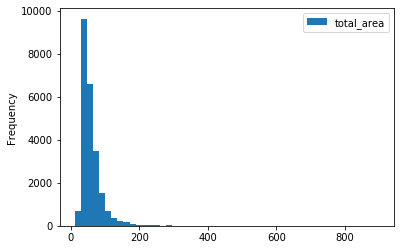

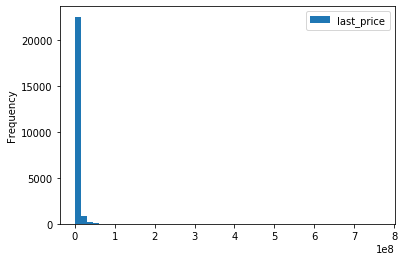

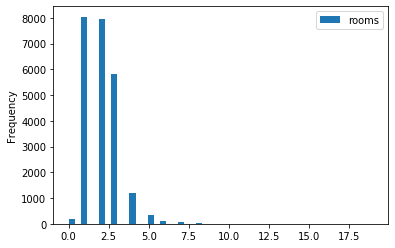

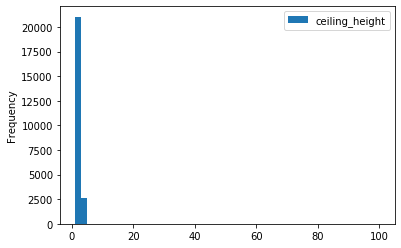

In [32]:
names = ('total_area', 'last_price', 'rooms','ceiling_height')
for k in names: 
    flat_data.plot(y = k,  kind='hist', bins = 50)

---
## Комментарий от наставника

При анализе ты проводишь однотипные действия на каждом шаге. Попробуй автоматизировать процесс построения графиков через цикл или собственную функцию.

---

<font color=green> Автоматизация процесса построения графиков выполнена.
    
---

## Изучение время продажи квартиры.

По столбцу days_exposition выбрали минимальное и максимальное значение. Неправдоподбно большое значение составляет 1580 дне, что составляет время продажи квартиры четыре года. И так же неправдоподбно минимальное значение покупки квартиры, который составляет один день. 
Сама гистрограмма напоминает пуассоновское распределение, если не считать пик на 200-ом дне, что очень похоже на правду. В среднем продажа квартира занимает от 124 дней до 180. 

In [33]:
flat_data['days_exposition'].min()


1

In [34]:
flat_data['days_exposition'].max()

1580

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb650d2710>]],
      dtype=object)

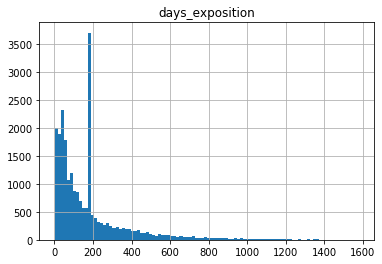

In [35]:
flat_data.hist('days_exposition', bins = 100, range =(1,1580))

Методом describe() посмотрели на числовые характеристики данного столбца,в которой отражены и минимальное и медианное значение.

In [36]:
flat_data['days_exposition'].describe()

count    23699.000000
mean       180.769357
std        204.449917
min          1.000000
25%         45.000000
50%        124.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

## Редкие и выбивающиеся значения.

Для анализа редких и выбивающих значений использовали метод boxplot(), так называемая диаграмма размаха. При построении каждого  графика мы руководствовались такой логикой: изначально строили по максимальному и минимальному значению, затем избавлялись от характерных выбросов, которые не входили в межквартильный размах.Затем посредством разреза данных методa query() избавлялись от характерных выбросов. 

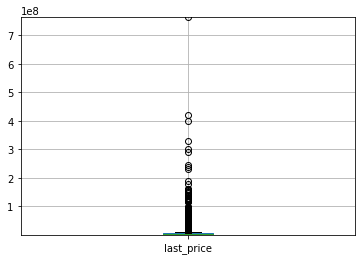

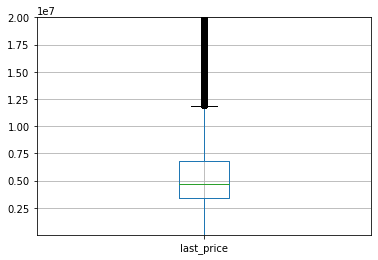

In [37]:
plt.ylim(12190,763000000)
flat_data.boxplot('last_price')
plt.show()
flat_data.boxplot('last_price')
plt.ylim(12190,20000000)
plt.show()

In [38]:
flat_data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [39]:
query_price = flat_data.query(' last_price < 10000000 & last_price > 12190')

In [40]:
query_price['last_price'].describe()

count    2.091600e+04
mean     4.633651e+06
std      1.948136e+06
min      4.300000e+05
25%      3.300000e+06
50%      4.300000e+06
75%      5.800000e+06
max      9.999999e+06
Name: last_price, dtype: float64

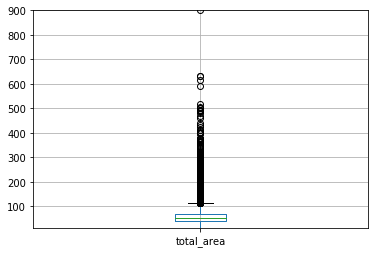

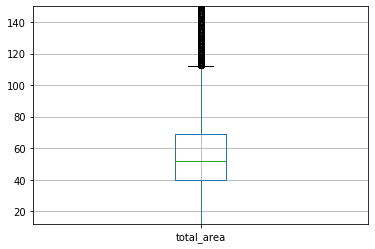

In [41]:
plt.ylim(12,900)
flat_data.boxplot('total_area')
plt.show()
flat_data.boxplot('total_area')
plt.ylim(12,150)
plt.show()

In [42]:
query_area = flat_data.query('total_area < 120')

In [43]:
query_area['total_area'].describe()

count    22601.000000
mean        54.526879
std         19.950685
min         12.000000
25%         39.000000
50%         50.000000
75%         66.000000
max        119.000000
Name: total_area, dtype: float64

In [44]:
flat_data['total_area'].describe()

count    23699.000000
mean        60.120511
std         35.665822
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

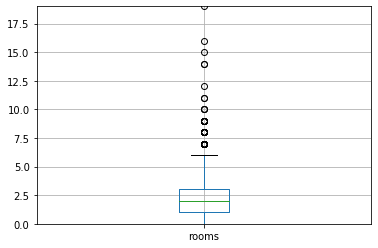

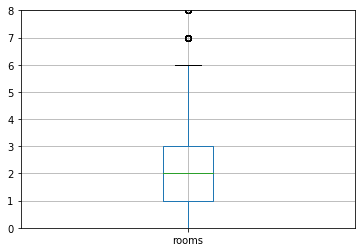

In [45]:
plt.ylim(0,19)
flat_data.boxplot('rooms')
plt.show()
flat_data.boxplot('rooms')
plt.ylim(0,8)
plt.show()

In [46]:
flat_data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [47]:
query_rooms = flat_data.query('0 < rooms < 6')

In [48]:
query_rooms['rooms'].describe()

count    23307.000000
mean         2.047411
std          0.959638
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

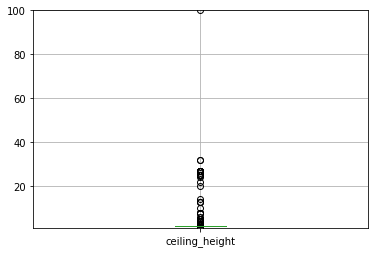

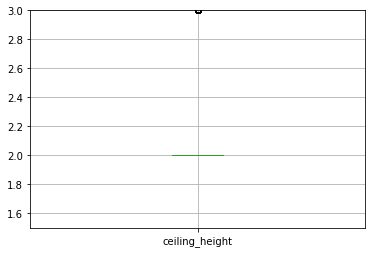

In [49]:
plt.ylim(1,100)
flat_data.boxplot('ceiling_height')
plt.show()
flat_data.boxplot('ceiling_height')
plt.ylim(1.5,3)
plt.show()

In [50]:
flat_data['ceiling_height'].describe()


count    23699.000000
mean         2.145534
std          1.053210
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max        100.000000
Name: ceiling_height, dtype: float64

In [51]:
query_height = flat_data.query('1.5 < ceiling_height < 3')

In [52]:
query_height['ceiling_height'].describe()

count    21035.0
mean         2.0
std          0.0
min          2.0
25%          2.0
50%          2.0
75%          2.0
max          2.0
Name: ceiling_height, dtype: float64

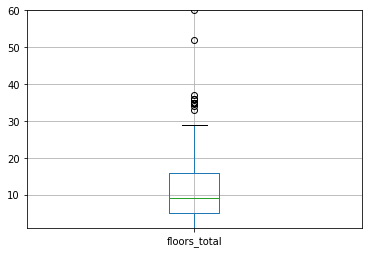

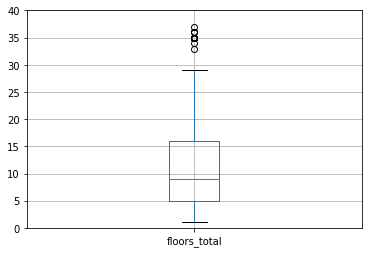

In [53]:
plt.ylim(1,60)
flat_data.boxplot('floors_total')
plt.show()
flat_data.boxplot('floors_total')
plt.ylim(0,40)
plt.show()

In [54]:
flat_data['floors_total'].describe()

count    23699.000000
mean        10.669859
std          6.588001
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [55]:
query_floors = flat_data.query('0 < floors_total < 30')

In [56]:
query_floors['floors_total'].describe()

count    23667.000000
mean        10.635104
std          6.521444
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

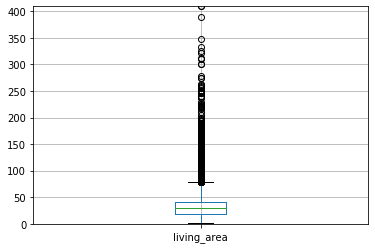

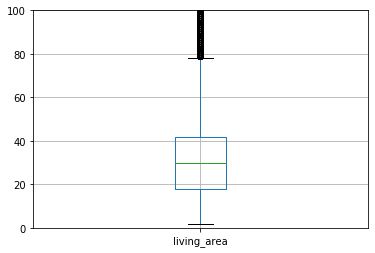

In [57]:
plt.ylim(0,409)
flat_data.boxplot('living_area')
plt.show()
flat_data.boxplot('living_area')
plt.ylim(0,100)
plt.show()

In [58]:
flat_data['living_area'].describe()

count    23699.000000
mean        34.327018
std         22.642184
min          2.000000
25%         18.000000
50%         30.000000
75%         42.000000
max        409.000000
Name: living_area, dtype: float64

In [59]:
query_living = flat_data.query('0 < living_area < 80')
query_living['living_area'].describe()

count    22882.000000
mean        31.373962
std         14.147217
min          2.000000
25%         18.000000
50%         30.000000
75%         41.000000
max         79.000000
Name: living_area, dtype: float64

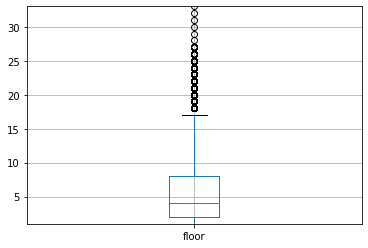

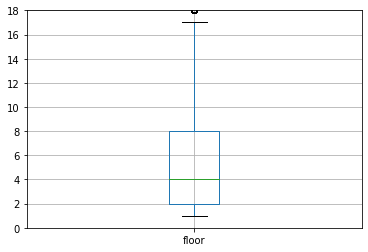

In [60]:
plt.ylim(1,33)
flat_data.boxplot('floor')
plt.show()
flat_data.boxplot('floor')
plt.ylim(0,18)
plt.show()

In [61]:
flat_data['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [62]:
query_floor = flat_data.query('0 < floor < 18')
query_floor['floor'].describe()

count    22777.000000
mean         5.281468
std          3.871898
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         17.000000
Name: floor, dtype: float64

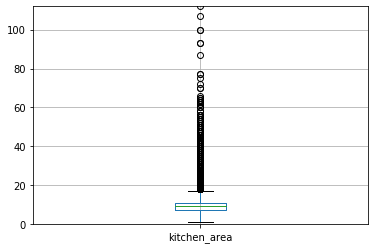

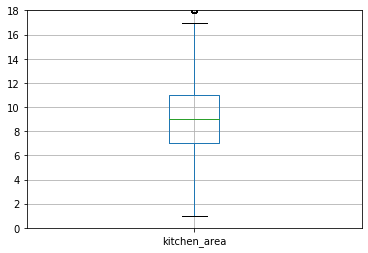

In [63]:
plt.ylim(0,112)
flat_data.boxplot('kitchen_area')
plt.show()
flat_data.boxplot('kitchen_area')
plt.ylim(0,18)
plt.show()

In [64]:
flat_data['kitchen_area'].describe()

count    23699.000000
mean        10.284189
std          5.812596
min          1.000000
25%          7.000000
50%          9.000000
75%         11.000000
max        126.000000
Name: kitchen_area, dtype: float64

In [65]:
query_kitchen = flat_data.query('1 < kitchen_area < 30')
query_kitchen['kitchen_area'].describe()


count    23298.000000
mean         9.772041
std          3.993225
min          2.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         29.000000
Name: kitchen_area, dtype: float64

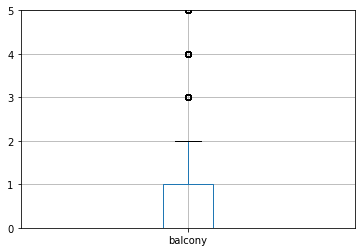

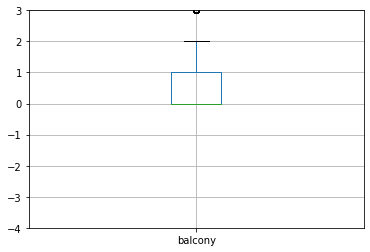

In [66]:
plt.ylim(0,5)
flat_data.boxplot('balcony')
plt.show()
flat_data.boxplot('balcony')
plt.ylim(-4,3)
plt.show()

In [67]:
flat_data['balcony'].describe()

count    23699.000000
mean         0.591080
std          0.959298
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

In [68]:
query_balcony = flat_data.query('balcony < 2 & balcony >= 0')
query_balcony['balcony'].describe()


count    19472.000000
mean         0.215438
std          0.411136
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: balcony, dtype: float64

<font color=green> Да, теперь выбросы из данных удалены. Конечно, этот процесс также стоит автоматизировать.
    
---

---
## Комментарий от наставника

Выбросы на глаз не определяются. Для их обнаружения есть график boxplot. Построй его для описанных в задании параметров. На его основании удали выбросы из данных.

---

---
## Комментарий от наставника

Выбросов в географических параметрах быть не может. Квартиру с 15 комнатами представить сложно и строить выводы по таким данным сложно. А вот то, что квартира находится дальше 55 км от аэропорта представить можно, это не будет выбросом.

---

##  Факторы влияющие на стоимость квартиры

В этом разделе рассматриваем зависимость между параметрами квартиры и её стоимостью.  

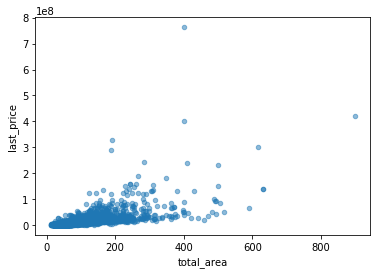

In [69]:
flat_data.plot(x ='total_area', y ='last_price', kind='scatter', alpha = 0.5)

In [70]:
flat_data['last_price'].corr(flat_data['total_area'])

0.6536539818654253

Имеется зависимость между площадью квартиры и и её стоимостью. Если с ростом первой величины, растёт вторая, то коэффициент корреляции -  положительный.  

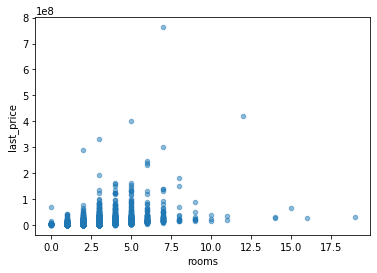

In [71]:
flat_data.plot(x ='rooms', y ='last_price', kind='scatter', alpha = 0.5)

In [72]:
flat_data['rooms'].corr(flat_data['last_price'])

0.36334284996489546

Зависимость между количеством комнат и ценой небольшая. 

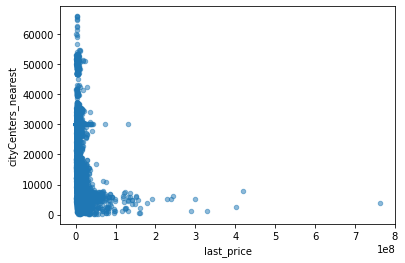

In [73]:
flat_data.plot(x ='last_price', y ='cityCenters_nearest', kind='scatter', alpha = 0.5)

In [74]:
flat_data['last_price'].corr(flat_data['cityCenters_nearest'])

-0.2651078217094055

Корреляция между ценой и отдаленностью центра получилась отрицательная, чем дальше от центра, тем ниже цена. 

In [75]:
flat_data['floor2'] = ((flat_data['floor'] <= 1) == True)
flat_data['last_price'].corr(flat_data['floor2'])

-0.05980973304374688

In [76]:
flat_data['last_price'].corr(flat_data['floor2'])

-0.05980973304374688

In [77]:
flat_data['floor33'] = ((flat_data['floor'] >= 33) == True)
flat_data['last_price'].corr(flat_data['floor33'])

0.0020039349004939747

In [78]:
flat_data['floor25'] = (((flat_data['floor'] < 33) & (flat_data['floor'] >= 1)) == True)
flat_data['last_price'].corr(flat_data['floor25'])

-0.002003934900493976

In [79]:
flat_data['last_price'].corr(flat_data['floor25'])

-0.002003934900493976

Здесь рассмотрели зависимость между ценой и этажом. Как видим зависимость либо совсем небольшая, либо отсутствует вовсе. 

---
## Комментарий от наставника

Правильно. Метод corr() можно применять ко всему датафрейму для получения матрицы корреляций.

---

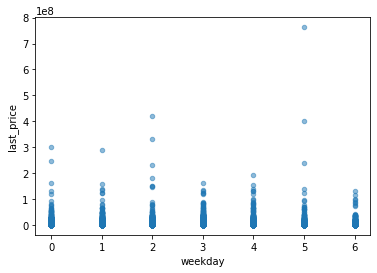

In [80]:
flat_data.plot(x ='weekday', y ='last_price', kind='scatter', alpha = 0.5)

In [81]:
flat_data['last_price'].corr(flat_data['weekday'])

0.0015501452176215431

Зависимость между ценой и днем недели тоже совсем небольшая. 

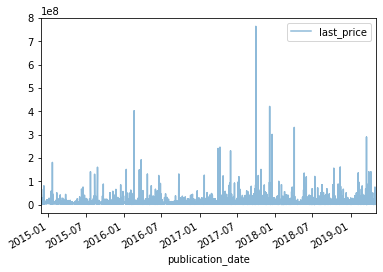

In [82]:
flat_data.plot(x ='publication_date', y ='last_price', alpha = 0.5)

---
## Комментарий от наставника

Это что-то страшное. По оси Y обозначается зависимая переменная. То есть дата зависит от цены в твоем варианте. Это не так. Лучше использовать точечный график (scatter()) для того, чтобы не было подобного.

---

Судя по графику зависимости между датой публикации и ценой тоже нет. 

## Выбираем  10 населённых пунктов с наибольшим числом

In [83]:
result = flat_data['locality_name'].value_counts().sort_values(ascending = False).head(10)
for name, count in result.items():
    print(flat_data.query('locality_name == @name').filter(["price_square_meter"]).mean(), name)
    

price_square_meter    115347.299472
dtype: float64 Санкт-Петербург
price_square_meter    86379.549808
dtype: float64 посёлок Мурино
price_square_meter    79068.186364
dtype: float64 посёлок Шушары
price_square_meter    68984.801508
dtype: float64 Всеволожск
price_square_meter    103610.948509
dtype: float64 Пушкин
price_square_meter    75735.150888
dtype: float64 Колпино
price_square_meter    90675.235474
dtype: float64 посёлок Парголово
price_square_meter    69045.068404
dtype: float64 Гатчина
price_square_meter    93001.742475
dtype: float64 деревня Кудрово
price_square_meter    58295.691983
dtype: float64 Выборг


Логика такая в result записали список 10 населенных пунктов с наибольшим количеством объявлений. Затем используя цикл методом items() прогоняем эти значения  в этом списке через операцию разреза данных в пределах этого списка, совместно с  методом  filter() указываем соответствующий столбец по которому  находим среднюю цену квадратного мера по населенным пунктам. 

---
## Комментарий от наставника

Верно, можно привести график зависимости цены от местоположения.

---

In [84]:
result = flat_data['locality_name'].value_counts().sort_values(ascending = False).head(10)
for name, count in result.items():
    head = flat_data.query('locality_name == @name').filter(["last_price"])
    print(head, name)

       last_price
0        13000000
2         5196000
3        64900000
4        10000000
7         7915000
...           ...
23689     3550000
23690     5500000
23691     9470000
23694     9700000
23697    11475000

[15721 rows x 1 columns] Санкт-Петербург
       last_price
8         2900000
38        3150000
60        2740000
133       3150000
144       2450000
...           ...
23442     2500000
23461     3195000
23472     3750000
23539     3600000
23638     4920000

[522 rows x 1 columns] посёлок Мурино
       last_price
1         3350000
57        3200000
82        4500000
160       3300000
171       3800000
...           ...
23527     3490000
23562     2500000
23612     3150000
23639     4250000
23640     2440000

[440 rows x 1 columns] посёлок Шушары
       last_price
112       2500000
198       2900000
215       3700000
224       5650000
225       3350000
...           ...
23519     2850000
23524     3937424
23561     2300000
23607     3700000
23677     2450000

[398 rows x 1 c

In [85]:
result = flat_data['locality_name'].value_counts().sort_values(ascending = False).tail(10)
for name, count in result.items():
    head = flat_data.query('locality_name == @name').filter(["last_price"])
    print(head, name)

       last_price
20900      850000 деревня Пустынка
       last_price
12003      950000 деревня Курковицы
       last_price
18900     1800000 городской посёлок Свирьстрой
       last_price
16862      999999 поселок Ромашки
       last_price
21979     3099000 деревня Лупполово
       last_price
16393     1800000 деревня Пижма
       last_price
23048     2449000 коттеджный посёлок Лесное
       last_price
10183     1600000 посёлок Форт Красная Горка
      last_price
4480     1900000 посёлок Мыза-Ивановка
       last_price
23683     2100000 посёлок Дзержинского


Для нахождения самой высокой и нихой цены по населенным пунктам использовали ту же логику, что и в предыдущем задании. 

## Изучаем предложения квартир в центре. 

In [86]:
flat_data['cityCenters_nearest_km'] = flat_data['cityCenters_nearest']/1000


Находим расстояние до центра в километрах. 

In [104]:
flat_data['mean_km']= flat_data.groupby('locality_name').agg({'cityCenters_nearest_km' : 'mean', 'last_price' : 'mean'})
flat_data['mean_km'] = flat_data['last_price']/flat_data['cityCenters_nearest_km']


Рассчитываем среднюю цену за каждый километр. 

In [105]:
query_spb = flat_data.query('locality_name == "Санкт-Петербург"')
query_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,publication_date_year,publication_date_year_month,floor1,residential_ratio,kitchen_ratio,floor2,floor33,floor25,cityCenters_nearest_km,mean_km
0,20,13000000,108,2019-03-07T00:00:00,3,2,16,51,8,False,...,2019,3,Другой этаж,0,0,False,False,True,16.028,8.110806e+05
2,10,5196000,56,2015-08-20T00:00:00,2,2,5,34,4,False,...,2015,8,Другой этаж,0,0,False,False,True,13.933,3.729276e+05
3,0,64900000,159,2015-07-24T00:00:00,3,2,14,97,9,False,...,2015,7,Другой этаж,0,0,False,False,True,6.800,9.544118e+06
4,2,10000000,100,2018-06-19T00:00:00,2,3,14,32,13,False,...,2018,6,Другой этаж,0,0,False,False,True,8.098,1.234873e+06
7,5,7915000,71,2019-04-18T00:00:00,2,2,24,40,22,False,...,2019,4,Другой этаж,0,0,False,False,True,11.634,6.803335e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000,35,2018-02-28T00:00:00,1,2,15,16,4,False,...,2018,2,Другой этаж,0,0,False,False,True,16.081,2.207574e+05
23690,3,5500000,52,2018-07-19T00:00:00,2,2,5,31,2,False,...,2018,7,Другой этаж,0,0,False,False,True,6.263,8.781734e+05
23691,11,9470000,72,2016-10-13T00:00:00,2,2,25,40,7,False,...,2016,10,Другой этаж,0,0,False,False,True,4.489,2.109601e+06
23694,9,9700000,133,2017-03-21T00:00:00,3,3,5,73,3,False,...,2017,3,Другой этаж,0,0,False,False,True,4.232,2.292060e+06


Выделяем квартиры в Санкт-Петербурге. 

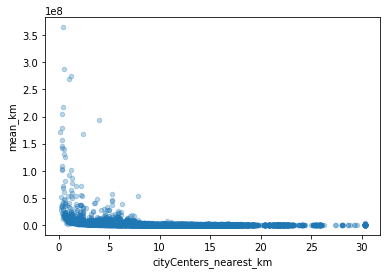

In [106]:
query_spb.plot(x ='cityCenters_nearest_km', y ='mean_km', kind = 'scatter', alpha = 0.3)

In [107]:
query_spb['cityCenters_nearest_km'].corr(query_spb['mean_km'])

-0.2515169435233007

---
## Комментарий от наставника

Надо найти средние значения по цене на каждом километре и построить график по этим средним значениям. 

Центр не стоит брать с запасом. Тем более в 2 раза больше, чем обозначено. 5 км - вполне приемлемая граница для центра.

---

Выделим сегмент квартир в центре, судя по графику средняя стоимость метра начинает резко расти где-то на расстоянии 5 км. 

In [108]:
query_spb_centers = query_spb.query('cityCenters_nearest < 5000')

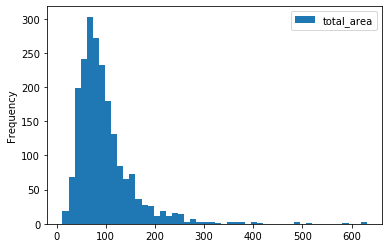

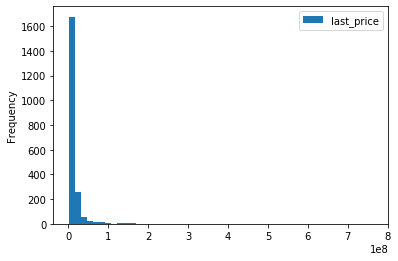

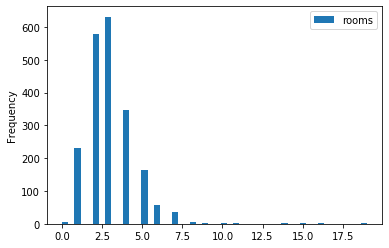

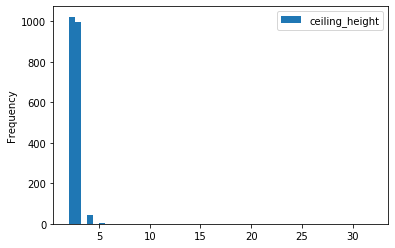

In [109]:
names = ('total_area', 'last_price', 'rooms','ceiling_height')
for k in names: 
    query_spb_centers.plot(y = k,  kind='hist', bins = 50)

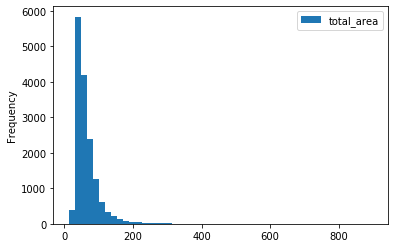

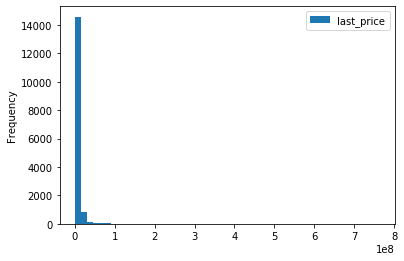

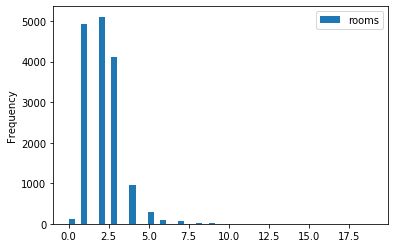

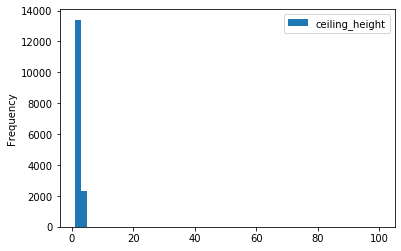

In [110]:
names = ('total_area', 'last_price', 'rooms','ceiling_height')
for k in names: 
    query_spb.plot(y = k,  kind='hist', bins = 50)

Какие отличия выявлены по предложениям центра города и по предложениям всего города: 
1) Как будто бы общая площадь в центре разнообразнее, т.е. есть  и совсем маленькие площади, есть так же выше среднего. В общем на любой вкус и кошелек. А по городу больше идет стандарт. 
2) Цены в пределах центра и в пределах города разнятся. Естественно цены по центру существенее выше, чем цены по всему городу.
3) Количество однокомнатных по городу преобладают, а количество двух и трех комнатных ниже. В центре же всё наоборот. 

---
## Комментарий от наставника

Также построение графиков стоит автоматизировать.

---

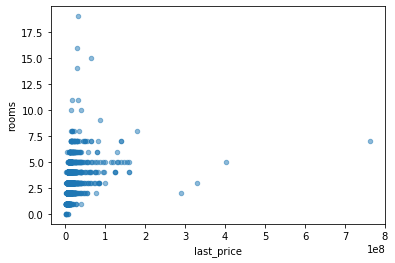

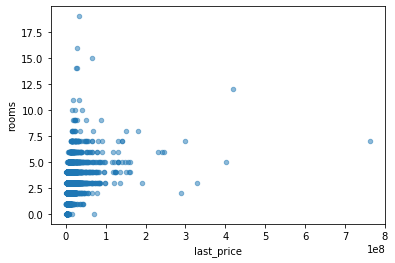

In [111]:
query_spb_centers.plot(x ='last_price', y ='rooms', kind='scatter', alpha = 0.5)
query_spb.plot(x ='last_price', y ='rooms', kind='scatter', alpha = 0.5)

In [112]:
query_spb_centers['last_price'].corr(query_spb_centers['rooms'])

0.26880254060686437

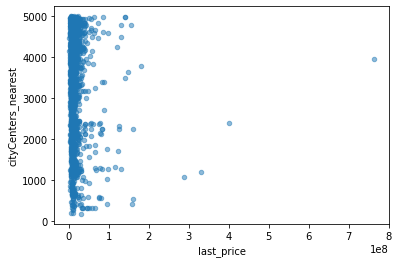

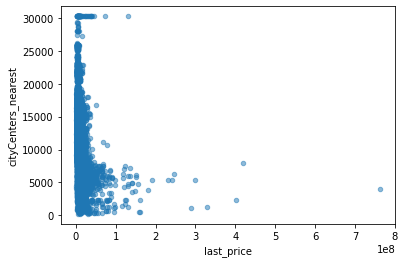

In [113]:
query_spb_centers.plot(x ='last_price', y ='cityCenters_nearest', kind='scatter', alpha = 0.5)
query_spb.plot(x ='last_price', y ='cityCenters_nearest', kind='scatter', alpha = 0.5)

In [114]:
query_spb_centers['last_price'].corr(query_spb_centers['cityCenters_nearest'])

-0.08337788170173967

In [115]:
query_spb['last_price'].corr(query_spb_centers['cityCenters_nearest'])

-0.08337788170173967

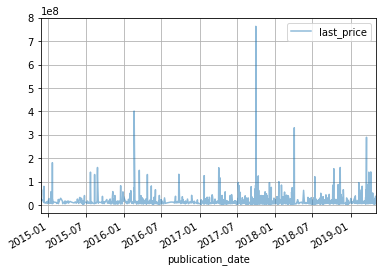

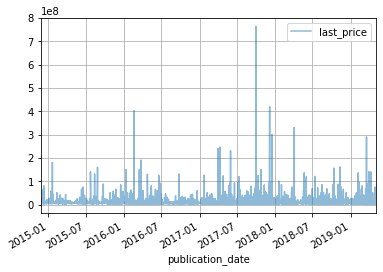

In [116]:
query_spb_centers.plot(x ='publication_date', y ='last_price', alpha = 0.5,  grid=True)
query_spb.plot(x ='publication_date', y ='last_price', alpha = 0.5,  grid=True)

А вот зависимость между параметрами квартиры в центре между параметрами квартир по городу не отличается. 

<font color=green> Различия все же есть, однако они не глобальные. Описать их стоит.
    
---

### Шаг 5. Общий вывод

В данной работе были выявлены: 
- Большое количество пропусков и неопределеннх типов данных. 
- В таблицу были добавлены новы параметры: цена квадратного метра,день недели, месяц и год публикации объявления,этаж квартиры; 
  соотношение жилой и общей площади, а также отношение площади кухни к общей.
- Было так же изучено время продажи квартиры: Неправдоподбно большое значение составляет 1580 дней, что составляет время   продажи квартиры четыре года. И так же неправдоподбно минимальное значение покупки квартиры, который составляет один день.   Сама  гистрограмма напоминает пуассоновское распределение, если не считать пик на 200-ом дне, что очень похоже на правду.
   В среднем продажа квартира занимает от 124 дней до 180. 
- Был проведен исследовательский анализ по предложениям квартир в Санкт-Петербурге и близлежащих населенных пунктах.
- Были изучены параметры по всем предложениям квартир и обнаружены выбросы: по ценам, высоте потолков и т.д  
- Был убраны  редкие и выбивающиеся значения при анализе параметров квартир. 
- Выявлены факторы влияющие на стоимость квариры: цена за квадратный метр и так же удаленность от центра. 
- Выведены рекордсмены по количеству объявлений и рассчитаны их средняя цена квадратнго метра по населенным пунктам:Санкт-Петербург, посёлок Мурино, посёлок Шушары, Всеволожск, Пушкин, Колпино, посёлок Парголово, Гатчина, деревня Кудрово,  Выборг
- Так же выявлены рекодсмены по самой высокой и низкой стоимостью ими оказались: 
- Лучшие из них: Санкт-Петербург, посёлок Мурино, посёлок Шушары, Всеволожск, Пушкин,Колпино, посёлок Парголово, Гатчина,деревня Кудрово, Выборг
- Аутсайдеры: коттеджный посёлок Лесное, деревня Большое Рейзино, посёлок Пансионат Зелёный Бор, деревня Пижма, поселок городского типа Большая Ижора, поселок станции Лужайка, деревня Каськово, садоводческое некоммерческое товарищество Лесная Поляна, поселок Почап, поселок Дружноселье.
- Был изучен сегмент квартир по городу Санкт-Петербург и и по центру города, была выявлена разница по паметрам предложений:
-  Как будто бы общая площадь в центре разнообразнее, т.е. есть  и совсем маленькие площади, есть так же выше среднего. В общем на любой вкус и кошелек. А по городу больше идет стандарт. 
-  Цены в пределах центра и в пределах города разнятся. Естественно цены по центру существенее выше, чем цены по всему городу.
-  Количество однокомнатных по городу преобладают, а количество двух и трех комнатных ниже. В центре же всё наоборот.  

<font color=green> 
    
Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения, правильно. Также можно расписать все, что было сделано и какими методами. 

---

---
## Комментарий от наставника

После исправления всех неточностей в работе при необходимости исправь выводы.

---

<font color=green> Помарки исправлены и теперь работа выполнена хорошо. Успехов в дальнейших проектах :)
    
---

## Комментарий от наставника

- Вначале работы следует описывать данные с которыми работаешь;
- Если еще не встречалась с библиотекой seaborn, то изучи ее. Можно строить презентабельные графики с ее помощью;
- Исправь заполнение пропусков. Уж очень много неточностей;
- Автоматизируй построение графиков;
- Очищай данные от выбросов. Они вызывают смещение в данных. Используй boxplot;
- Строй графики правильно;
- Описывай все свои мысли и выдвигай больше гипотез.

Ты проделала большую работу, молодец! Однако работы предстоит еще много. Исправь все помарки и получится хорошая работа. Ошибки - наши лучшие учителя. Жду твоей работы :)

-----

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод